# Numerical Simulation Laboratory (NSL)
## Numerical exercises 9
### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!
Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference</span>
- 34 cities randomly placed **inside** a square</span>

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path in cartesian coordinates

## <span style="color:purple"> Solution Exercise 09.1</span>

### Problem's Theory:
Genetic algorithms are optimization techniques inspired by the process of natural selection in biological evolution. In a genetic algorithm, key components include genes, individuals, and a population. Each individual is made up of a combination of genes, and together, individuals form a population. The algorithm works by applying various genetic operators—such as mutation and crossover—to the individuals, which allows the population to evolve over time.

The goal of the genetic algorithm is to minimize a given loss function by finding the best individual. In each iteration (or generation), the algorithm selects the fittest individuals—those with the lowest loss values—and applies genetic operators to create a new population. Through this process of selection, crossover, and mutation, the population gradually converges toward an optimal solution, where the loss function is minimized.
### Problem's approach:
To build up a GA i created two classes: `individue` that is inherited by `population`. The `individue` class is composed by four different elements: an armadillo vector of integers, an integers to store the dimension, a map that associate to an integer two double (coordinates) and a random number. The integers represent the city labels. shuffling the integers of the vector the path of the traveller changes. To each integer are associated by the map the position that permits to compute the loss of the path.
The `population` class is composed by 3 integers (the numbers of the cities, the size of the population, the index of the individues selected) a random number generator and a field of individues.

- In the `individue` class I have implemented:
    - some methods to access elements of an individue
    - two methods to initialize an individue on a circle or in a square
    - a method to calculate the loss of the individue
    - some methods to mutate an individue and to shuffle his indexes
    - a function that check that the individue is defined correctly

- In the `population`class I have implemented:
    - two methods to define a population on a circle or in a square
    - some methods to access element of the population
    - a method to get the mean loss and the best loss
    - a method to check if the population is correctly defined
    - a crossover method
    - a mutation method
    - a selection method

After the population is initialized, the algorithm focuses exclusively on an `ivec` (vector of integers) that represents potential paths. This integer vector encodes the sequence of locations, allowing the algorithm to search for the optimal path **without directly interacting with the map coordinates** during the search process.
Coordinates are only required when calculating the **L2 loss** (or total path distance). At that specific point, the algorithm maps the integer sequence back to the corresponding coordinates to compute the loss.
This approach enhances efficiency by deferring any coordinate-based calculations until they are necessary for evaluating path quality.


### Code:

**Some methods of the `Individue` class:**

- Initialization method on the circle
```cpp
    // initialization of individue on a circle
    void initialize_circle(int dim_indi,double r,Random &rnd) {
        _rnd = &rnd;
        _dim=dim_indi;
        _indi.set_size(_dim);
        for(size_t i=0;i<_dim;i++){_indi(i)=i;}
        double x, y,app;
        int sign;
        for(size_t i = 0; i < _dim; ++i) {
            x=_rnd->Rannyu(-r, r);
            double app = _rnd->Rannyu();
            sign = (app < 0.5) ? -1 : 1;
            y = sign * sqrt(r * r - x * x);
            _indi_map[i]={x,y};
        }
    }
```
- some methods to check the individue:
```cpp
    // check individue
    bool checkIndividual() {
        std::unordered_set<int> existingIndices;
        for (size_t i = 0; i < _dim; ++i) {
            if (existingIndices.find(_indi(i)) != existingIndices.end()) {
            cerr << "Error in checkIndividual: duplicate index found" << endl; exit(-1);
            }
            if(_indi(0)!=0){cerr << "Error in checkIndividual: first index is not 0" << endl; exit(-1);}
        }
        return true;
    }
```
- The method to compute the **Loss** of an individue:
```cpp
    double get_indi_Loss() const {
        double loss = 0;
        for(size_t i=0;i<_dim-1;i++){
            loss+=arma::norm(_indi_map.at(_indi(i)) - _indi_map.at(_indi(i+1)),2);
        }
        loss+=arma::norm(_indi_map.at(_indi(_dim-1)) - _indi_map.at(_indi(0)),2);
        return loss;
    }
```
- Some **mutation methods** for Individues:
    
    - Switch of two cities
    ```cpp
        // Pair permutation two indexes
        void pair_permutation(int i, int j){
            ivec r=_indi;
            if(i>=_dim-1 || j>=_dim-1){cerr << "Error in pair permutation : indexes out of range" << endl; exit(-1);}
            // copy the vector without the first element that remains fixed
            ivec r_new = r.subvec(1, r.n_elem - 1);
            ivec r_app=r_new;

            // swap the elements i and j
            r_new[i]=r_app[j];
            r_new[j]=r_app[i];

            r_new.insert_rows(0,1);
            r_new(0)=r(0);
            _indi=r_new;
        } 
    ```
    
    - Divide the individue in two blocks and switch them (with PBC)
    ```cpp
        void block_permutation(int m, int k, int n){

            // ------------------------- PARAMETERS ----------------------------
            // m length of the block, k start of the block1, n start of the block2
            // -----------------------------------------------------------------

            ivec r=_indi;
            if(((r.size())/2)<(m+1)){cerr << "Error in block permutation : block length or start index too big " << endl; exit(-1);}
            if(fabs(n-k)<(m+1)){cerr << "Error in block permutation : block length or start index too big " << endl; exit(-1);}
            // copy the vector without the first element that remains fixed
            ivec r_new = r.subvec(1, r.n_elem - 1);
            ivec r_app=r_new;
            ivec blk1,blk2;
            for(int i=0;i<m;i++){
                blk1.insert_rows(i,1);
                blk1(i)=r_app(pbc(k+i,r_new.size()));
                blk2.insert_rows(i,1);
                blk2(i)=r_app(pbc(n+i,r_new.size()));
                }
            for(int i=0;i<m;i++){
                r_new(pbc(k+i,r_new.size()))=blk2(i);
                r_new(pbc(n+i,r_new.size()))=blk1(i);
                }
            // add the first element
            r_new.insert_rows(0,1);
            r_new(0)=r(0);
            _indi=r_new;
        }
    ```
**Some methods of the `Population` class:**
```cpp
    void checkPopulation() {
        for (size_t i = 0; i < _dim_pop; ++i) {
            if (!pop(i).checkIndividual()) {
                pop(i).printIdxs();
                throw std::runtime_error("Invalid population member: individual "+std::to_string(i)+" is not valid:" );
            }
        }
    }
```
- method to compute the **mean Loss** for half population:
```cpp
    double get_pop_mean_Loss(){
        // Sort the population based on the loss
        std::vector<std::pair<double, size_t>> loss_indices;
        for (size_t i = 0; i < pop.n_elem; ++i) {
            loss_indices.push_back(std::make_pair(pop[i].get_indi_Loss(), i));
        }
        std::sort(loss_indices.begin(), loss_indices.end());
        double loss=0;
        int half_pop=(int)_dim_pop/2;
        for(size_t i=0; i<half_pop;i++){
            loss+=loss_indices[i].first;
        }
        return loss/half_pop;
    }
```
- Method to sort the population from the loss
```cpp
    // Sort the population based on the loss
    void sort(){ 
        arma::field<Individue> new_pop;
        new_pop.set_size(_dim_pop);
        // Sort the population based on the loss
        std::vector<std::pair<double, size_t>> loss_indices;
        for (size_t i = 0; i < pop.n_elem; ++i) {
            loss_indices.push_back(std::make_pair(pop[i].get_indi_Loss(), i));
        }
        std::sort(loss_indices.begin(), loss_indices.end());
        for(int i=0;i<_dim_pop;i++){
            new_pop[i] = pop[loss_indices[i].second];
        }
        pop=new_pop;
    }
```
- Methods to select stronger individues and create a new population mutating the survived ones:


    - The **selection method** builds a new population by prioritizing individuals with lower loss values. Selection follows a **power-law distribution**, meaning that individuals with smaller losses (i.e., better paths) are more likely to be chosen for the next generation.

    ```cpp
        void Selection() {
            int _sel;
            sort();
            arma::field<Individue> new_pop;
            new_pop.set_size(_dim_pop);
            for(int i=0;i<_dim_pop;i++){
                _sel=static_cast<int>((double)_dim_pop * (pow(_rnd->Rannyu(), 6)));
                new_pop[i] = pop[_sel];
            }
            // Replace the old population with the new one
            pop = new_pop;
            sort();
        }
    ```
    - The **crossover method** combines two individuals (solutions) to produce a new one. This process takes parts of each parent's sequence and mixes them to create a new individual that inherits features from both. By blending characteristics of the parent paths, the crossover method introduces diversity and enables exploration of new paths.

    ```cpp
        //Crossover
        std::pair<ivec ,ivec> crossover(ivec mother_idxs,ivec father_idxs, double rand){

            // ------------------------- PARAMETERS ----------------------------
            // mother and father are two vectors of the same size
            // -----------------------------------------------------------------

            ivec new_mother_idxs=mother_idxs;
            ivec new_father_idxs=father_idxs;

            if(mother_idxs.size()!=father_idxs.size()){cerr << "Error in crossover : vectors of different size: " << endl; exit(-1);}
            ivec child1(mother_idxs.n_elem,arma::fill::zeros);
            ivec child2(father_idxs.n_elem,arma::fill::zeros);  

            int bar = (int)(mother_idxs.n_elem * rand);
            for (int i = 0; i < bar; i++) {
                child1(i) = father_idxs(i);
                child2(i) = mother_idxs(i); 
            }        
            fillVector(child1, mother_idxs);
            fillVector(child2, father_idxs);


            new_mother_idxs=child1;
            new_father_idxs=child2;

            return std::make_pair(new_mother_idxs,new_father_idxs);
        }
    ```
    - The **mutation method** modifies individuals in the newly created population to introduce small random changes. After applying the selection and crossover methods to create the new population, mutation is used to ensure diversity by slightly altering some of the individuals' paths. This helps prevent the algorithm from getting stuck in local optima and promotes exploration of a broader range of potential solutions.

    ```cpp
        void Mutation(double rnd_cross,double rnd_pair,double rnd_shift,double rnd_blkperm,double rnd_inv){

            //... variables declaration ...

            for(int index1=0;index1<_dim_pop;index1++){

                // update indexes and individue
                index2=index1;
                sindi=pop[index1];

                // Crossover
                rand_cross=_rnd->Rannyu();
                if(rand_cross<rnd_cross){
                    // Do not allow crossover between the same individue
                    while(arma::approx_equal(pop[index1].get_idxs(), pop[index2].get_idxs(), "absdiff", 1e-10)){index2=(int)_rnd->Rannyu(0,_dim_pop);}
                    double rand=_rnd->Rannyu();
                    new_indi_idxs=crossover(pop[index1].get_idxs(),pop[index2].get_idxs(),rand);
                    if(_rnd->Rannyu()<0.5){sindi.set_idxs(new_indi_idxs.first);}else{sindi.set_idxs(new_indi_idxs.second);}
                }

                // PERFORM MUTATION WITH PROBABILITY rnd_mut

                //Pair permutation
                rand_mut=_rnd->Rannyu();
                if(rand_mut<rnd_pair){
                    sindi.pair_permutation((int)_rnd->Rannyu(0,_dim_indi-1),(int)_rnd->Rannyu(0,_dim_indi-1));
                }
                //Block shift
                rand_mut=_rnd->Rannyu();
                if(rand_mut<rnd_shift){
                    k=(int)_rnd->Rannyu(0,_dim_indi-1);
                    m=(int)_rnd->Rannyu(1,_dim_indi-1);
                    n=(int)_rnd->Rannyu(1,_dim_indi-1-m);
                    if(_rnd->Rannyu()<0.5){sindi.block_shift(k,m,n);}else{sindi.block_shift(k,n,m);}
                }
                //Block permutation
                rand_mut=_rnd->Rannyu();
                if(rand_mut<rnd_blkperm){
                    m=(int)_rnd->Rannyu(0,(int)(_dim_indi)/2);
                    k=(int)_rnd->Rannyu(0,_dim_indi-1-m);
                    n=(int)_rnd->Rannyu(k+m+1,_dim_indi+k-m-1);
                    sindi.block_permutation(m,k,n);
                }
                //Inversion
                rand_mut=_rnd->Rannyu();
                if(rand_mut<rnd_inv){               
                    m=(int)_rnd->Rannyu(0,_dim_indi-1);
                    k=(int)_rnd->Rannyu(0,_dim_indi-1);
                    sindi.inversion(k,m);
                }
                pop[index1]=sindi;
            }
        }
    ```
- Main code where the algorithm is called:
```cpp
    pop.initialize_square(indi_dim, pop_dim,1., &rnd);
    pop.checkPopulation();
    mat A=pop[0].Get_positions(); 
    // Save the matrix in CSV format
    A.save("Results/matrix_square_0.csv", arma::csv_ascii);
    for(int i=0;i<iterations;i++){ 
        pop.Selection(); 
        pop.Mutation(rnd);
        pop.checkPopulation(); 
        if(i%10==0){
            // save losses and results
            square_losses << i <<";"<<pop.get_pop_mean_Loss()<<";" << pop[0].get_indi_Loss()  << endl;
            A=pop[0].Get_positions();
            A.save("Results/matrix_square"+to_string(i)+".csv", arma::csv_ascii);
        } 
    } 
```

### Cities on a Circumference and in a square: 
- When the cities are arranged around a circle, the algorithm finds the optimal path in approximately **15x10 iterations**. In contrast, for cities distributed within a square, the algorithm requires around **250 iterations** to converge. This difference is due to the increased complexity of finding the best path in a square distribution, where there are more possible configurations and no inherent symmetry as in the circular arrangement.

    The parameters used for the simulation are:
    - $N_{\text{epochs}}=500$
    - $N_{\text{cities}}=34$

    The hyperparameters used for mutations are: 
    - $N_{\text{individues}}=250$
    - Exponent of the power law distribution for selection $= 6$
    - crossover probability $= 0.65$
    - mutations probability $= 0.1$

### Results:
As shown in the GIFs and the loss plots above, the **Genetic Algorithm (GA)** successfully finds the optimal path among the cities, whether they are arranged on a circumference or inside a square. The gradual decrease in loss values over iterations demonstrates the algorithm’s effectiveness in identifying shorter paths, confirming that it works as expected for both configurations.
- Circle:
    - Best loss  = 6.23672
- Square:
    - Best loss  = 10.2509

#### GIFs and Loss plots

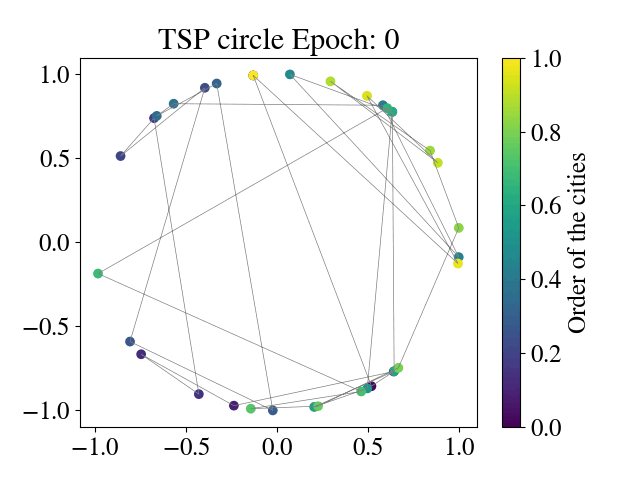

In [ ]:
from IPython.display import Image

# Display the GIF
Image(filename='../lecture_9/Results/circle.gif')


In [1]:
from IPython.display import HTML
HTML('<img src="../lecture_9/Results/circle.gif">')

Plot of the search of the genetic algorithm that find the best path during the training in the circle configuaration of the cities

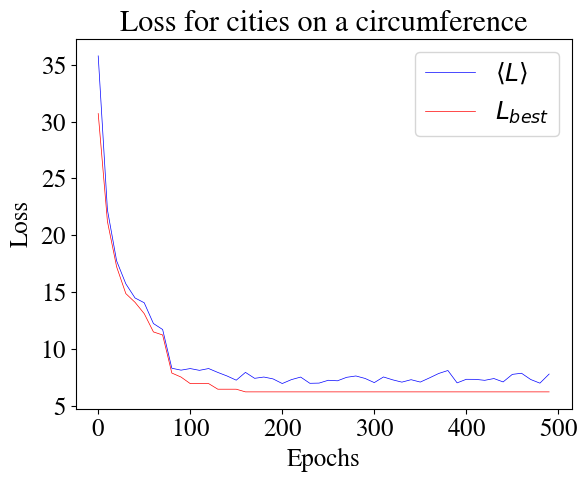

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral','font.size':'18','axes.formatter.use_mathtext':'True'})
# read the file CSV
data = np.loadtxt('../lecture_9/Results/circle_losses.csv', delimiter=';',skiprows=1)
# Connect the dots with a line
plt.plot(data[:,0],data[:,1], color='blue', linestyle='-', linewidth=0.5,label=r'$\left<L\right>$')
plt.plot(data[:,0],data[:,2], color='red', linestyle='-', linewidth=0.5,label=r'$L_{best}$')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for cities on a circumference')
plt.legend()
# Show the plot
plt.show()

Decreasing of the loss during the training of the circle configuration of the cities. As we can see after 150 epochs the minimun is reached

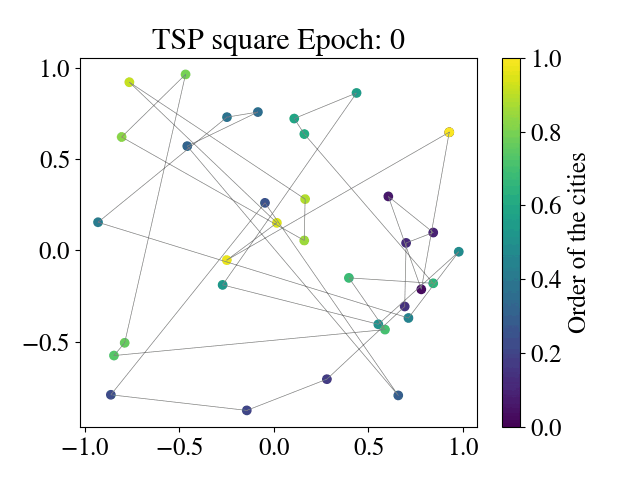

In [10]:
from IPython.display import Image

# Display the GIF
Image(filename='../lecture_9/Results/square.gif')

Plot of the search of the genetic algorithm that find the best path during the training in the square configuration of the cities

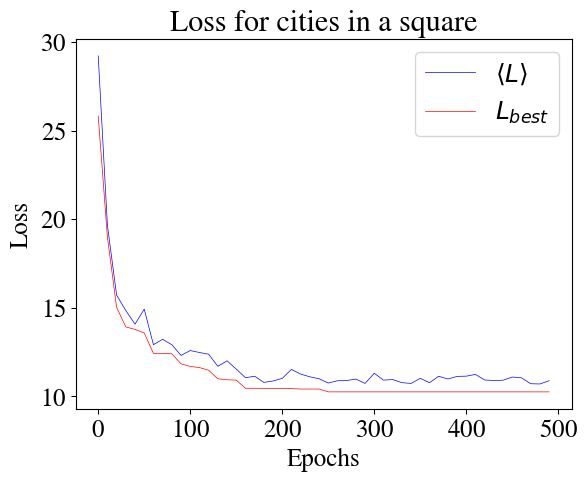

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral','font.size':'18','axes.formatter.use_mathtext':'True'})
# read the file CSV
data = np.loadtxt('../lecture_9/Results/square_losses.csv', delimiter=';',skiprows=1)
# Connect the dots with a line
plt.plot(data[:,0],data[:,1], color='blue', linestyle='-', linewidth=0.5,label=r'$\left<L\right>$')
plt.plot(data[:,0],data[:,2], color='red', linestyle='-', linewidth=0.5,label=r'$L_{best}$')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss for cities in a square')
plt.legend()
# Show the plot
plt.show()

The deacreasing of the loss during the training in the square configuration of the cities. As we can see after 250 epochs the algorithm converge to a good solution.

#### Code used to convert file.csv in file.png

```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral','font.size':'18','axes.formatter.use_mathtext':'True'})
# read the file CSV
string_pattern=['circle','square']
num_vec=np.arange(10,510,10)
string_vec=num_vec.astype(str)
for pattern in string_pattern:
    for gen in string_vec:
        data = np.loadtxt('matrix_'+pattern+'_'+gen+'.csv', delimiter=',')
        # Extract the x and y coordinates
        x = data[0,:]
        y = data[1,:]
        x = np.append(x, x[0])
        y = np.append(y, y[0])
        # Create a color gradient
        colors = np.linspace(0, 1, len(x))
        # Crea un colormap
        cmap = plt.get_cmap('viridis')
        # Create a scatter
        sc = plt.scatter(x, y, c=colors, cmap=cmap)
        # Connect the dots with a line
        plt.plot(x, y, color='gray', linestyle='-', linewidth=0.5)
        # Add a colorbar
        plt.colorbar(sc, label='Order of the cities')
        # Add labels and title
        plt.title('TSP '+pattern+' Epoch: '+gen)
        plt.savefig('png_files/'+pattern+'_files/'+gen+'_'+pattern+'.png')
        plt.close()
```